# Other Supervised Learning

## Naive Bayes Classifiers

In [1]:
# load the iris dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


## Support Vector Machines(SVMs)

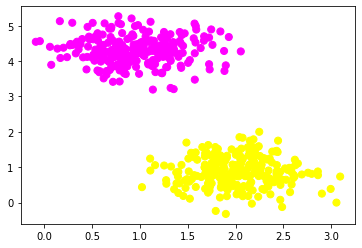

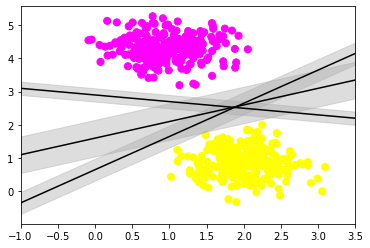

In [2]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 

# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40) 
import matplotlib.pyplot as plt 
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 


# What Support vector machines do, is to not only draw a line between two classes here, but consider a region about the line of some given width

import numpy as np
# creating line space between -1 to 3.5 
xfit = np.linspace(-1, 3.5) 

# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 

# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
	yfit = m * xfit + b 
	plt.plot(xfit, yfit, '-k') 
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
	color='#AAAAAA', alpha=0.4) 

plt.xlim(-1, 3.5); 
plt.show() 

## SVM Hyperparameter Tuning using GridSearchCV

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 

df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 

# cancer column is our target 
df_target = pd.DataFrame(cancer['target'], columns =['Cancer']) 

print("Feature Variables: ") 
print(df_feat.info()) 

print("Dataframe looks like : ") 
print(df_feat.head()) 

# Train Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size = 0.30, random_state = 101) 

# Train the Support Vector Classifier without Hyper-parameter Tuning
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 

# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 


# Use GridsearchCV
from sklearn.model_selection import GridSearchCV 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			  'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions)) 



  0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  


## Using SVM to perform classification on a non-linear dataset

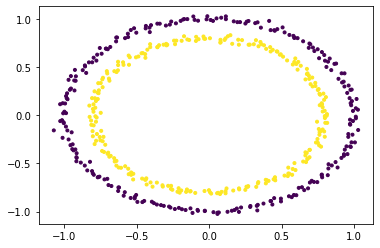

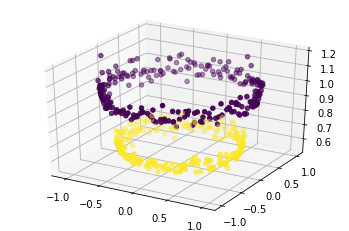

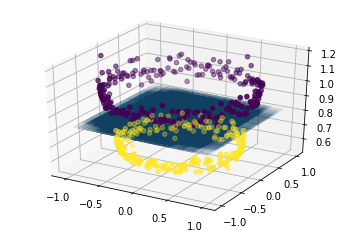

In [4]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 

# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 

# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 